In [33]:
import sys
sys.path.append('../')

In [34]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_excel("../data/2-PreferenciasBritanicos(TP1).xlsx")
df

,scones,cerveza,wiskey,avena,futbol,Nacionalidad
0,0,0,1,1,1,I
1,1,0,1,1,0,I
2,1,1,0,0,1,I
3,1,1,0,0,0,I
4,0,1,0,0,1,I
5,0,0,0,1,0,I
6,1,0,0,1,1,E
7,1,1,0,0,1,E
8,1,1,1,1,0,E
9,1,1,0,1,0,E


In [36]:
predicted = {
    0: "I",
    1: "E",
    2: "I",
    3: "I",
    4: "E",
    5: "I",
    6: "E"
}

In [37]:
expected = {
    0: "I",
    1: "I",
    2: "I",
    3: "I",
    4: "I",
    5: "I",
    6: "E"
}

In [38]:
from confusion_matrix import calculate_confusion_matrix, \
                             calculate_relative_confusion_matrix, \
                             get_confusion_matrix_row, \
                             get_confusion_matrix_value

In [39]:
conf_mat = calculate_confusion_matrix(df["Nacionalidad"].unique(), predicted, expected)
conf_mat

,I,E
I,4.0,2.0
E,0.0,1.0


In [40]:
rel_conf_mat = calculate_relative_confusion_matrix(df["Nacionalidad"].unique(), predicted, expected)
rel_conf_mat

,I,E
I,0.666667,0.333333
E,0.000000,1.000000


In [41]:
get_confusion_matrix_row(conf_mat, real="I")

,I,E
I,4.0,2.0


In [42]:
get_confusion_matrix_value(conf_mat, real="I", predicted="E")

2.0

In [43]:
from confusion_matrix import calculate_per_label_confusion_matrix

In [44]:
per_label_conf_mats = calculate_per_label_confusion_matrix(df["Nacionalidad"].unique(), predicted, expected)

In [45]:
for out_label in df["Nacionalidad"].unique():
    print("Confusion Matrix for: \"" + str(out_label) + "\"")
    display(per_label_conf_mats[out_label])
    print("\n------------------------------------------------\n")

Confusion Matrix for: "I"


,P,F
P,4.0,2.0
F,0.0,1.0



------------------------------------------------

Confusion Matrix for: "E"


,P,F
P,1.0,0.0
F,2.0,4.0



------------------------------------------------



In [46]:
from plotter import plot_confusion_matrix

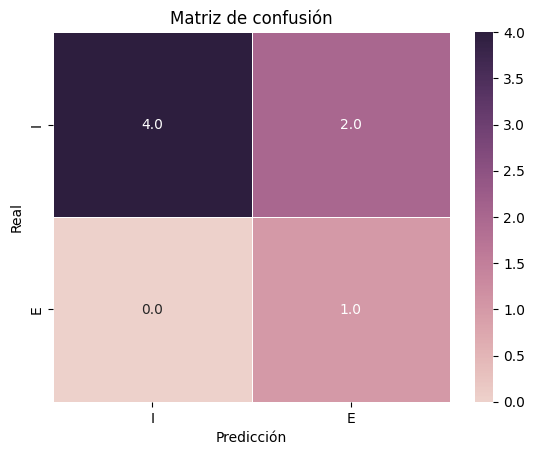

In [47]:
plot_confusion_matrix(conf_mat, "Matriz de confusión", "conf_mat.png")

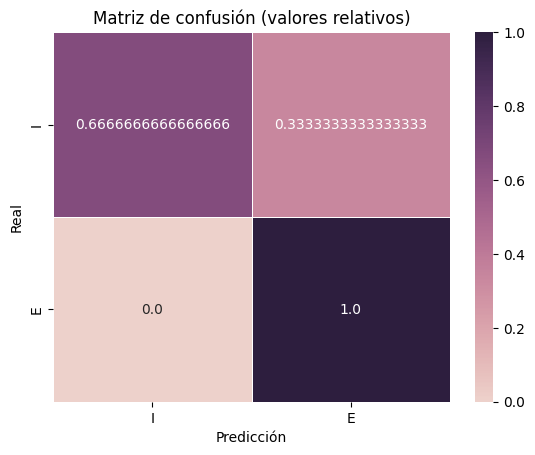

In [48]:
plot_confusion_matrix(rel_conf_mat, "Matriz de confusión (valores relativos)", "rel_conf_mat.png")